# EfficientNet Implementation   - EfficientNet- B0

## Training a Custom  Model from scratch

# Data Pre Processing

In [1]:
import numpy as np
import tensorflow as tf

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('dataset')

print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))

['horizontal_prefix', 'horizontal_suffix', 'main', 'vertical_prefix', 'vertical_suffix']
Types of classes labels found:  5


In [2]:
class_labels = []

for item in dataset_path:
 # Get all the file names
 all_classes = os.listdir('dataset' + '/' +item)
 #print(all_classes)

 # Add them to the list
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))
    #print(class_labels[:5])

In [3]:

# Build a dataframe        
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

              Labels                                              image
0  horizontal_prefix   dataset_path/horizontal_prefix/Dresden_5bD2a.png
1  horizontal_prefix   dataset_path/horizontal_prefix/Dresden_5bF1c.png
2  horizontal_prefix  dataset_path/horizontal_prefix/Dresden_65aD31.png
3  horizontal_prefix  dataset_path/horizontal_prefix/Dresden_65aD32.png
4  horizontal_prefix  dataset_path/horizontal_prefix/Dresden_65aE22.png
              Labels                                            image
170  vertical_suffix   dataset_path/vertical_suffix/Dresden_5bD2c.png
171  vertical_suffix  dataset_path/vertical_suffix/Dresden_65aB22.png
172  vertical_suffix  dataset_path/vertical_suffix/Dresden_65aD22.png
173  vertical_suffix  dataset_path/vertical_suffix/Dresden_65aF22.png
174  vertical_suffix   dataset_path/vertical_suffix/Dresden_7bC2c.png


In [4]:
# Let's check how many samples for each category are present
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  175
main                 75
vertical_prefix      43
horizontal_suffix    27
horizontal_prefix    16
vertical_suffix      14
Name: Labels, dtype: int64


In [5]:
import cv2
path = 'dataset/'
dataset_path = os.listdir('dataset')

im_size = 224

images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [6]:

#This model takes input images of shape (224, 224, 3), and the input data should range [0, 255]. 

images = np.array(images)

images = images.astype('int64') / 255.0
images.shape

(175, 224, 224, 3)

In [7]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

['horizontal_prefix' 'horizontal_prefix' 'horizontal_prefix'
 'horizontal_prefix' 'horizontal_prefix' 'horizontal_prefix'
 'horizontal_prefix' 'horizontal_prefix' 'horizontal_prefix'
 'horizontal_prefix' 'horizontal_prefix' 'horizontal_prefix'
 'horizontal_prefix' 'horizontal_prefix' 'horizontal_prefix'
 'horizontal_prefix' 'horizontal_suffix' 'horizontal_suffix'
 'horizontal_suffix' 'horizontal_suffix' 'horizontal_suffix'
 'horizontal_suffix' 'horizontal_suffix' 'horizontal_suffix'
 'horizontal_suffix' 'horizontal_suffix' 'horizontal_suffix'
 'horizontal_suffix' 'horizontal_suffix' 'horizontal_suffix'
 'horizontal_suffix' 'horizontal_suffix' 'horizontal_suffix'
 'horizontal_suffix' 'horizontal_suffix' 'horizontal_suffix'
 'horizontal_suffix' 'horizontal_suffix' 'horizontal_suffix'
 'horizontal_suffix' 'horizontal_suffix' 'horizontal_suffix'
 'horizontal_suffix' 'main' 'main' 'main' 'main' 'main' 'main' 'main'
 'main' 'main' 'main' 'main' 'main' 'main' 'main' 'main' 'main' 'main'
 'mai

In [8]:

y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y).toarray()
print(Y[:5])
print(Y[35:])

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1

In [9]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)



(166, 224, 224, 3)
(166, 5)
(9, 224, 224, 3)
(9, 5)



# EfficientNet Implementation :



In [10]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

NUM_CLASSES = 5
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)


inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))


# Using model without transfer learning

outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

In [11]:
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] )

model.summary()

hist = model.fit(train_x, train_y, epochs=30, verbose=2)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 5)                4055976   
                                                                 
Total params: 4,055,976
Trainable params: 4,013,953
Non-trainable params: 42,023
_________________________________________________________________
Epoch 1/30
6/6 - 42s - loss: 5.0250 - accuracy: 0.2169 - 42s/epoch - 7s/step
Epoch 2/30
6/6 - 28s - loss: 3.8482 - accuracy: 0.2711 - 28s/epoch - 5s/step
Epoch 3/30
6/6 - 33s - loss: 2.7048 - accuracy: 0.3735 - 33s/epoch - 6s/step
Epoch 4/30
6/6 - 30s - loss: 2.9905 - accuracy: 0.3916 - 30s/epoch - 5s/step
Epoch 5/30
6/6 - 28s - loss: 2.0414 - accuracy: 0.4277 - 28s/epoch - 5s/step
Epoch 6/30
6/6 - 28s - loss: 2.8571 - accuracy: 0.3434 - 

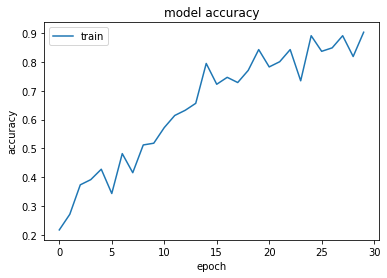

In [12]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    #plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

In [13]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1/1 [==============================] - 2s 2s/step - loss: 6.8030 - accuracy: 0.2222
Loss = 6.802985668182373
Test Accuracy = 0.2222222238779068


# Testing Efficient Model On Unseen data

Input image shape: (1, 224, 224, 3)


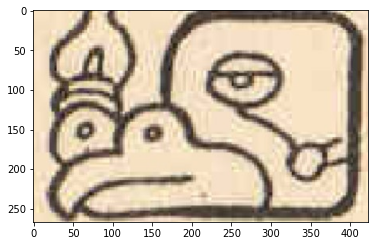

In [14]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input


img_path = 'unseen.jfif'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [15]:
preds=model.predict(x)
preds     # probabilities for being in each of the 5 classes

array([[0.03510451, 0.3792852 , 0.01073035, 0.30315343, 0.2717265 ]],
      dtype=float32)

In [16]:

# Cuda and cudnn is installed for this tensorflow version. So we can see GPU is enabled
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [17]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_performance =model.fit(train_x, train_y, epochs=30, verbose=2)
    cpu_performance

Epoch 1/30
6/6 - 28s - loss: 0.9459 - accuracy: 0.8373 - 28s/epoch - 5s/step
Epoch 2/30
6/6 - 28s - loss: 0.7401 - accuracy: 0.8494 - 28s/epoch - 5s/step
Epoch 3/30
6/6 - 29s - loss: 0.8896 - accuracy: 0.8554 - 29s/epoch - 5s/step
Epoch 4/30
6/6 - 29s - loss: 0.6436 - accuracy: 0.8313 - 29s/epoch - 5s/step
Epoch 5/30
6/6 - 29s - loss: 0.6110 - accuracy: 0.8434 - 29s/epoch - 5s/step
Epoch 6/30
6/6 - 30s - loss: 0.3110 - accuracy: 0.9096 - 30s/epoch - 5s/step
Epoch 7/30
6/6 - 28s - loss: 0.4213 - accuracy: 0.8976 - 28s/epoch - 5s/step
Epoch 8/30
6/6 - 29s - loss: 0.3041 - accuracy: 0.9217 - 29s/epoch - 5s/step
Epoch 9/30
6/6 - 29s - loss: 0.4827 - accuracy: 0.9337 - 29s/epoch - 5s/step
Epoch 10/30
6/6 - 29s - loss: 0.6693 - accuracy: 0.8855 - 29s/epoch - 5s/step
Epoch 11/30
6/6 - 28s - loss: 0.5038 - accuracy: 0.8735 - 28s/epoch - 5s/step
Epoch 12/30
6/6 - 29s - loss: 0.1904 - accuracy: 0.9398 - 29s/epoch - 5s/step
Epoch 13/30
6/6 - 29s - loss: 0.3342 - accuracy: 0.9277 - 29s/epoch - 5s/

In [18]:

%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    gpu_performance =model.fit(train_x, train_y, epochs=30, verbose=2)
    gpu_performance

Epoch 1/30
6/6 - 28s - loss: 0.4889 - accuracy: 0.9217 - 28s/epoch - 5s/step
Epoch 2/30
6/6 - 29s - loss: 0.3311 - accuracy: 0.9458 - 29s/epoch - 5s/step
Epoch 3/30
6/6 - 29s - loss: 0.4773 - accuracy: 0.9398 - 29s/epoch - 5s/step
Epoch 4/30
6/6 - 28s - loss: 0.1814 - accuracy: 0.9518 - 28s/epoch - 5s/step
Epoch 5/30
6/6 - 28s - loss: 0.2097 - accuracy: 0.9880 - 28s/epoch - 5s/step
Epoch 6/30
6/6 - 28s - loss: 0.1434 - accuracy: 0.9578 - 28s/epoch - 5s/step
Epoch 7/30
6/6 - 29s - loss: 0.1109 - accuracy: 0.9699 - 29s/epoch - 5s/step
Epoch 8/30
6/6 - 29s - loss: 0.1594 - accuracy: 0.9639 - 29s/epoch - 5s/step
Epoch 9/30
6/6 - 29s - loss: 0.2180 - accuracy: 0.9699 - 29s/epoch - 5s/step
Epoch 10/30
6/6 - 28s - loss: 0.1335 - accuracy: 0.9639 - 28s/epoch - 5s/step
Epoch 11/30
6/6 - 29s - loss: 0.0906 - accuracy: 0.9699 - 29s/epoch - 5s/step
Epoch 12/30
6/6 - 29s - loss: 0.1648 - accuracy: 0.9458 - 29s/epoch - 5s/step
Epoch 13/30
6/6 - 29s - loss: 0.0960 - accuracy: 0.9759 - 29s/epoch - 5s/